<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson02_jupyter/lecture_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google colabへのリンク

# 使用しているversionについてと補足説明

In [1]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic'

In [2]:
# pythonのバージョン確認
!python -V

Python 3.7.14


In [3]:
# 一般的にpandasはpdと名前を付けてimportされる
import pandas as pd

In [4]:
# panasのversion
pd.__version__

'1.3.5'

## Pandasについて
- 公式ドキュメント：http://pandas.pydata.org/pandas-docs/stable/
- pandasは、Pythonにおいて、データ解析を支援する機能を提供するライブラリである。
- 特に、数表および時系列データを操作するためのデータ構造と演算を提供する。

## 参考リンク（もうちょっといろいろ知りたい人用）

**全般的に**
- [データ分析で頻出のPandas基本操作 - qiita](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)
    - 基本操作についてまとめてくれている。

**基本操作系**
- [Pandas Cheet Sheet - GitHub](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
    - 基本操作について1ページでまとめてくれているCheet Sheet
    
- [StatsFragments by @sinhrks](http://sinhrks.hatenablog.com/)
    - 各種Pandasメソッドを図付きで詳細に解説してくれています。非常に参考になる。
    

**集計テクニック系**
- [pandasで条件分岐(case when的な)によるデータ加工を網羅したい](https://qiita.com/Hyperion13fleet/items/98c31744e66ac1fc1e9f)
    - SQLのcase whenのような条件分岐の処理をpandasでやりたいときが良くありますがなかなか難しい。そんなときのお助け記事。
    
**作図系**
- [PythonでPandasのPlot機能を使えばデータ加工からグラフ作成までマジでシームレス - Qiita](https://qiita.com/hik0107/items/de5785f680096df93efa)
    - Pandas Plotでできることの概要がわかります
- [pythonで美しいグラフ描画 -seabornを使えばデータ分析と可視化が捗る その1 - Qiita](https://qiita.com/hik0107/items/3dc541158fceb3156ee0)
    - Pandas Plot, matplotlibと比較して簡単に美しいプロットがかけるmatplotのラッパーseabornの概要がわかります 

# 1. データの読み込み

元のデータ

http://phenol-explorer.eu/downloads

Structures for Polyphenols having composition data (SMILES)をダウンロード
して少しデータを追加したもの。

In [5]:
!wget https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson02_jupyter/data/compounds-structures.csv

--2022-10-07 02:44:23--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson02_jupyter/data/compounds-structures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102631 (100K) [text/plain]
Saving to: ‘compounds-structures.csv.6’

compounds-structure 100%[===================>] 100.23K  --.-KB/s    in 0.01s   

2022-10-07 02:44:23 (6.71 MB/s) - ‘compounds-structures.csv.6’ saved [102631/102631]



In [6]:
df = pd.read_csv('compounds-structures.csv', sep=',')

# 2. データや統計量の表示

In [7]:
df.head(1) 

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.58,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC


In [8]:
df.tail(1)

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
491,730,COC1=CC(=CC=C1O)C(=O)C(O)CO,Other polyphenols,Hydroxybenzoketones,"2,3-Dihydroxy-1-guaiacylpropanone",212.199,C10H12O5,NaN,2004-05-06 16:14:14 UTC,2015-05-10 23:29:00 UTC


In [9]:
df.sample()

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
327,483,[H][C@@]1(O)C[C@@](O)(C[C@@]([H])(OC(=O)\C=C\C...,Phenolic acids,Hydroxycinnamic acids,3-Sinapoylquinic acid,398.361,C18H22O10,NaN,2004-08-27 00:00:00 UTC,2015-05-10 23:28:52 UTC


# 3. 簡単にデータの状態を確認


In [10]:
df.shape

(492, 10)

In [11]:
df.columns

Index(['id', 'smiles', 'compound_class', 'compound_subclass', 'name',
       'molecular_weight', 'formula', 'cas_number', 'created_at',
       'updated_at'],
      dtype='object')

In [12]:
df.describe()

,id,molecular_weight
count,492.000000,492.000000
mean,376.518293,439.122771
std,211.994048,226.451341
min,3.000000,94.111200
25%,220.750000,302.225250
50%,381.500000,431.038000
75%,569.750000,578.519250
max,730.000000,2805.900000


In [13]:
df.describe(include='all')

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
count,492.000000,492,492,492,492,492.000000,492,193,492,492
unique,NaN,489,5,29,492,NaN,311,190,268,40
top,NaN,[H][C@@]1(O)CO[C@]([H])(OC2=CC3=C(O)C=C(O)C=C3...,Flavonoids,Flavonols,Malvidin 3-O-(6''-p-coumaroyl-glucoside),NaN,C7H6O4,607-80-7,2007-10-17 00:00:00 UTC,2015-05-10 23:28:47 UTC
freq,NaN,2,268,78,1,NaN,7,2,17,33
mean,376.518293,NaN,NaN,NaN,NaN,439.122771,NaN,NaN,NaN,NaN
std,211.994048,NaN,NaN,NaN,NaN,226.451341,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,94.111200,NaN,NaN,NaN,NaN
25%,220.750000,NaN,NaN,NaN,NaN,302.225250,NaN,NaN,NaN,NaN
50%,381.500000,NaN,NaN,NaN,NaN,431.038000,NaN,NaN,NaN,NaN
75%,569.750000,NaN,NaN,NaN,NaN,578.519250,NaN,NaN,NaN,NaN


# 4. データの欠損状態の確認

In [14]:
df.isnull()

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
487,False,False,False,False,False,False,False,False,False,False
488,False,False,False,False,False,False,False,True,False,False
489,False,False,False,False,False,False,False,False,False,False
490,False,False,False,False,False,False,False,True,False,False


In [15]:
df.isnull().any()

id                   False
smiles               False
compound_class       False
compound_subclass    False
name                 False
molecular_weight     False
formula              False
cas_number            True
created_at           False
updated_at           False
dtype: bool

In [16]:
# 欠損値を確認する。
df.isnull().sum()

id                     0
smiles                 0
compound_class         0
compound_subclass      0
name                   0
molecular_weight       0
formula                0
cas_number           299
created_at             0
updated_at             0
dtype: int64

# 5. 値（欠損）の置き換えや削除

In [17]:
df.shape

(492, 10)

In [18]:
# 欠損値を置き換え
df.fillna(value={'cas_number': 0}).head()

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.580,C32H31O14,0,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC
1,5,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,Flavonoids,Anthocyanins,Delphinidin 3-O-(6''-acetyl-galactoside),507.421,C23H23O13,0,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC
2,6,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,Flavonoids,Anthocyanins,Cyanidin 3-O-(6''-acetyl-galactoside),491.422,C23H23O12,0,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC
3,8,OC[C@H]1O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C...,Flavonoids,Anthocyanins,Cyanidin 3-O-galactoside,449.385,C21H21O11,0,2002-08-22 11:51:47 UTC,2015-05-10 23:28:36 UTC
4,9,OC[C@H]1O[C@@H](OC2=CC3=C(C=C(O)C=C3O)[O+]=C2C...,Flavonoids,Anthocyanins,Cyanidin 3-O-glucoside,449.385,C21H21O11,7084-24-4,2002-09-20 16:19:06 UTC,2015-05-10 23:28:36 UTC


In [19]:
# '欠損値のある行を削除（ここでは、cas_number）
df.dropna(subset=['cas_number'], axis=0).shape

(193, 10)

In [20]:
#欠損値のある列（ここでは、cas_number）を、１列指定して削除
df.drop('cas_number', axis=1).shape

(492, 9)

# 6. Pandasで新しいdfの作成

In [21]:
df.columns

Index(['id', 'smiles', 'compound_class', 'compound_subclass', 'name',
       'molecular_weight', 'formula', 'cas_number', 'created_at',
       'updated_at'],
      dtype='object')

In [22]:
# 任意の列だけ取り出す。
df[['smiles', 'formula']].head(3)

,smiles,formula
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12


In [23]:
# 上記のものは、変更されていないのでdfを表示させると、もとのままのデータになっている。
df.head(3)

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.580,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC
1,5,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,Flavonoids,Anthocyanins,Delphinidin 3-O-(6''-acetyl-galactoside),507.421,C23H23O13,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC
2,6,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,Flavonoids,Anthocyanins,Cyanidin 3-O-(6''-acetyl-galactoside),491.422,C23H23O12,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC


In [24]:
# 新しいdfを作成する。列を２つだけ、先頭の３行だけのdf2を作成する。
df2 = df[['smiles', 'formula']].head(3)	

In [25]:
df2

,smiles,formula
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12


In [26]:
df3 = df[['smiles', 'molecular_weight', 'compound_subclass']].head(3)
df3

,smiles,molecular_weight,compound_subclass
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,639.580,Anthocyanins
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,507.421,Anthocyanins
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,491.422,Anthocyanins


In [27]:
df23 = pd.merge(df2, df3)
df23

,smiles,formula,molecular_weight,compound_subclass
0,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,C32H31O14,639.580,Anthocyanins
1,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,C23H23O13,507.421,Anthocyanins
2,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,C23H23O12,491.422,Anthocyanins


# 7. データの処理(mapとapply）

### １つの列に適用

In [28]:
# 自作した関数を入れる。
def over_300(num):
    if int(num) >=300:
        return 1
    else:
        return 0
    
df["molecular_weight_over300"] = df["molecular_weight"].map(over_300)

In [29]:
df[["molecular_weight", "molecular_weight_over300"]]

,molecular_weight,molecular_weight_over300
0,639.580,1
1,507.421,1
2,491.422,1
3,449.385,1
4,449.385,1
...,...,...
487,122.121,0
488,154.120,0
489,136.148,0
490,150.174,0


## 2つの列に適用

In [30]:
def Flavonoids_over_500(row):
    if row["compound_class"] == "Flavonoids" and row["molecular_weight"] >= 500 :
        return 1
    else:
        return 0

In [31]:
df["Flavonoids_over_500"] = df.apply(Flavonoids_over_500, axis=1)
df[["compound_class", "molecular_weight", "Flavonoids_over_500"]]

,compound_class,molecular_weight,Flavonoids_over_500
0,Flavonoids,639.580,1
1,Flavonoids,507.421,1
2,Flavonoids,491.422,0
3,Flavonoids,449.385,0
4,Flavonoids,449.385,0
...,...,...,...
487,Other polyphenols,122.121,0
488,Other polyphenols,154.120,0
489,Other polyphenols,136.148,0
490,Other polyphenols,150.174,0


# 8. 変数の前処理(one-hot表現)

In [32]:
#Pandasを使ってワンホットエンコーディング
df2 = pd.get_dummies(df, columns=['compound_class'])

In [33]:
#@title
print("★変更前")
print(df.columns)
print("★get_dummies後")
df2.columns

★変更前
Index(['id', 'smiles', 'compound_class', 'compound_subclass', 'name',
       'molecular_weight', 'formula', 'cas_number', 'created_at', 'updated_at',
       'molecular_weight_over300', 'Flavonoids_over_500'],
      dtype='object')
★get_dummies後


Index(['id', 'smiles', 'compound_subclass', 'name', 'molecular_weight',
       'formula', 'cas_number', 'created_at', 'updated_at',
       'molecular_weight_over300', 'Flavonoids_over_500',
       'compound_class_Flavonoids', 'compound_class_Lignans',
       'compound_class_Other polyphenols', 'compound_class_Phenolic acids',
       'compound_class_Stilbenes'],
      dtype='object')

# 9. 集計や重複処理

In [36]:
df['smiles'].value_counts()

[H][C@@]1(O)CO[C@]([H])(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C(OC)=C2)[C@]([H])(O)[C@]1([H])O    2
[H][C@]12CO[C@H](C3=CC4=C(OCO4)C=C3)[C@@]1([H])CO[C@@H]2C1=CC2=C(OCO2)C=C1                            2
O[C@@H]1C[C@](O)(C(O)=O)C[C@@H](O)[C@H]1OC(=O)\C=C\C1=CC=C(O)C=C1                                     2
COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(=O)\C=C\C3=CC=C(O)C=C3)C(O)C(O)C1O)C(O)=CC(O)=C2        1
[H][C@@]1(O)C[C@](O)(C[C@@]([H])(OC(=O)\C=C\C2=CC(OC)=C(O)C(OC)=C2)[C@]1([H])O)C(O)=O                 1
                                                                                                     ..
COC1=CC=C(C=C1)C1=CC(=O)C2=C(O1)C(OC)=C(OC)C(O)=C2O                                                   1
COC1=C(OC)C=C(C=C1)C1=CC(=O)C2=C(O1)C(OC)=C(OC)C(O)=C2O                                               1
COC1=C(OC)C(O)=C2C(=O)C=C(OC2=C1)C1=CC=C(O)C=C1                                                       1
COC1=C(O)C2=C(OC(=CC2=O)C2=CC=C(O)C=C2)C=C1O                    

In [37]:
df.duplicated(subset='smiles')

0      False
1      False
2      False
3      False
4      False
       ...  
487    False
488    False
489    False
490    False
491    False
Length: 492, dtype: bool

In [38]:
df['smiles'].unique().tolist()

['COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(=O)\\C=C\\C3=CC=C(O)C=C3)C(O)C(O)C1O)C(O)=CC(O)=C2',
 'CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C(O)=C2)C(O)C(O)C1O',
 '[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC=C(O)C(O)=C2)[C@]([H])(O)[C@@]([H])(O)[C@@]1([H])O',
 'OC[C@H]1O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C=C2)[C@H](O)[C@@H](O)[C@H]1O',
 'OC[C@H]1O[C@@H](OC2=CC3=C(C=C(O)C=C3O)[O+]=C2C2=CC(O)=C(O)C=C2)[C@H](O)[C@@H](O)[C@@H]1O',
 'C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](OC3=CC4=C(O)C=C(O)C=C4[O+]=C3C3=CC(O)=C(O)C=C3)[C@H](O)[C@@H](O)[C@@H]2O)[C@H](O)[C@H](O)[C@H]1O',
 'OC[C@H]1O[C@@H](O[C@H]2[C@H](OC3=CC4=C(O)C=C(O)C=C4[O+]=C3C3=CC(O)=C(O)C=C3)O[C@H](CO)[C@@H](O)[C@@H]2O)[C@H](O)[C@@H](O)[C@@H]1O',
 'OC[C@@H]1O[C@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC=C(O)C=C2)[C@@H](O)[C@H](O)[C@H]1O',
 'O[C@@H]1[C@@H](COC(=O)CC(O)=O)O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=CC(O)=C(O)C=C2)[C@H](O)[C@H]1O',
 'COC1=C(O)C=CC(=C1)C1=[O+]C2=CC(O)=CC(O)=C2C=C1O',
 'C

In [39]:
df

,id,smiles,compound_class,compound_subclass,name,molecular_weight,formula,cas_number,created_at,updated_at,molecular_weight_over300,Flavonoids_over_500
0,3,COC1=CC(=CC(OC)=C1O)C1=[O+]C2=C(C=C1OC1OC(COC(...,Flavonoids,Anthocyanins,Malvidin 3-O-(6''-p-coumaroyl-glucoside),639.580,C32H31O14,NaN,2005-09-07 11:07:11 UTC,2015-05-10 23:28:36 UTC,1,1
1,5,CC(=O)OCC1OC(OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C2=C...,Flavonoids,Anthocyanins,Delphinidin 3-O-(6''-acetyl-galactoside),507.421,C23H23O13,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC,1,1
2,6,[H][C@]1(COC(C)=O)O[C@@]([H])(OC2=CC3=C(O)C=C(...,Flavonoids,Anthocyanins,Cyanidin 3-O-(6''-acetyl-galactoside),491.422,C23H23O12,NaN,2005-03-25 11:36:49 UTC,2015-05-10 23:28:36 UTC,1,0
3,8,OC[C@H]1O[C@@H](OC2=CC3=C(O)C=C(O)C=C3[O+]=C2C...,Flavonoids,Anthocyanins,Cyanidin 3-O-galactoside,449.385,C21H21O11,NaN,2002-08-22 11:51:47 UTC,2015-05-10 23:28:36 UTC,1,0
4,9,OC[C@H]1O[C@@H](OC2=CC3=C(C=C(O)C=C3O)[O+]=C2C...,Flavonoids,Anthocyanins,Cyanidin 3-O-glucoside,449.385,C21H21O11,7084-24-4,2002-09-20 16:19:06 UTC,2015-05-10 23:28:36 UTC,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
487,725,OC1=CC=C(C=O)C=C1,Other polyphenols,Hydroxybenzaldehydes,4-Hydroxybenzaldehyde,122.121,C7H6O2,123-08-0,2005-10-11 16:29:55 UTC,2015-05-10 23:29:00 UTC,0,0
488,726,OC1=CC(C=O)=CC(O)=C1O,Other polyphenols,Hydroxybenzaldehydes,Gallic aldehyde,154.120,C7H6O4,NaN,2007-03-28 00:00:00 UTC,2015-05-10 23:29:00 UTC,0,0
489,727,COC1=CC=C(C=O)C=C1,Other polyphenols,Hydroxybenzaldehydes,p-Anisaldehyde,136.148,C8H8O2,123-11-5,2007-12-18 13:31:28 UTC,2015-05-10 23:29:00 UTC,0,0
490,729,COC1=CC=CC(=C1)C(C)=O,Other polyphenols,Hydroxybenzoketones,3-Methoxyacetophenone,150.174,C9H10O2,NaN,2007-12-24 00:00:00 UTC,2015-05-10 23:29:00 UTC,0,0


# 10. 可視化


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39d4ecb910>]],
      dtype=object)

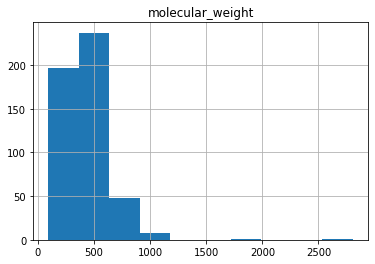

In [40]:
df.hist('molecular_weight')

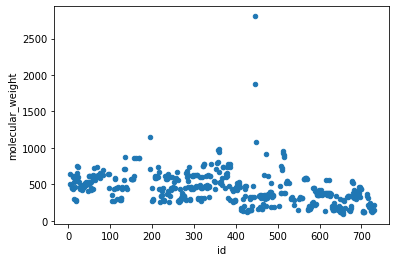

In [41]:
df.plot(kind='scatter', x='id', y='molecular_weight')

# 11. データの出力

In [42]:
df.to_csv('output2.csv', index=False)

# 以上です